Epoch 1/10


2023-08-10 01:40:07.448981: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


782/782 [==============================] - 25s 27ms/step - loss: 2.0541 - accuracy: 0.2427 - val_loss: 1.9031 - val_accuracy: 0.3200
Epoch 2/10
782/782 [==============================] - 20s 25ms/step - loss: 1.8851 - accuracy: 0.3134 - val_loss: 1.8480 - val_accuracy: 0.3266
Epoch 3/10
782/782 [==============================] - 19s 25ms/step - loss: 1.8278 - accuracy: 0.3376 - val_loss: 1.8106 - val_accuracy: 0.3583
Epoch 4/10
782/782 [==============================] - 20s 25ms/step - loss: 1.7850 - accuracy: 0.3562 - val_loss: 1.7653 - val_accuracy: 0.3700
Epoch 5/10
782/782 [==============================] - 20s 25ms/step - loss: 1.7605 - accuracy: 0.3652 - val_loss: 1.7398 - val_accuracy: 0.3779
Epoch 6/10
782/782 [==============================] - 20s 25ms/step - loss: 1.7414 - accuracy: 0.3720 - val_loss: 1.8040 - val_accuracy: 0.3635
Epoch 7/10
782/782 [==============================] - 20s 25ms/step - loss: 1.7279 - accuracy: 0.3779 - val_loss: 1.7192 - val_accuracy: 0.3802
Epo

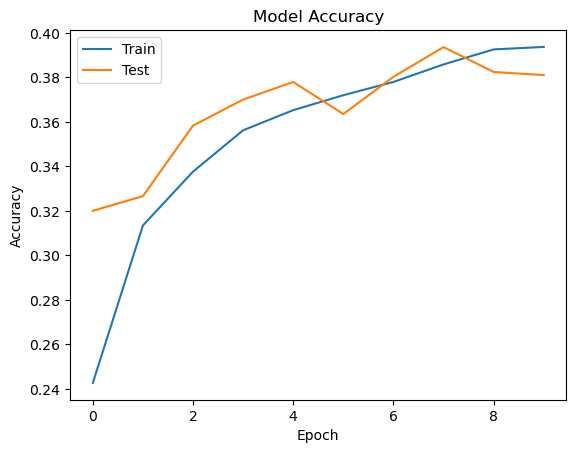

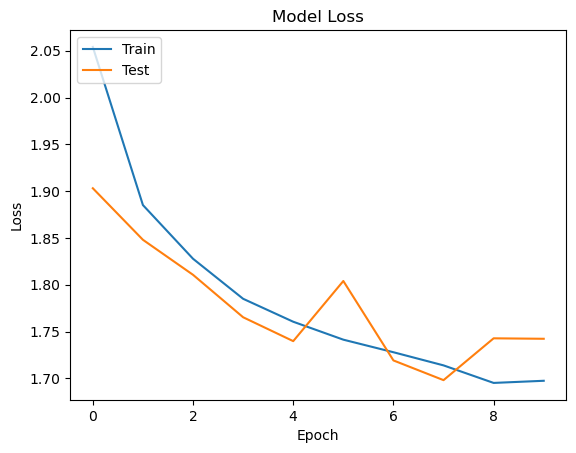

157/157 [==============================] - 3s 20ms/step - loss: 1.7423 - accuracy: 0.3810
Test accuracy: 0.38100001215934753


In [1]:
import tensorflow as tf
import tensorflow_datasets as tdf
import matplotlib.pyplot as py

(train_dataset, test_dataset), info = tdf.load('cifar10', split=['train', 'test'], with_info=True, as_supervised=True)
input_shape = info.features['image'].shape
num_classes = info.features['label'].num_classes


def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess).shuffle(1000).batch(64)
test_dataset = test_dataset.map(preprocess).batch(64)


resnet50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


for layer in resnet50.layers:
    layer.trainable = False


x = tf.keras.layers.GlobalAveragePooling2D()(resnet50.output)
x = tf.keras.layers.Dense(64, activation='tanh')(x)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)


model = tf.keras.Model(inputs=resnet50.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

py.plot(history.history['accuracy'])
py.plot(history.history['val_accuracy'])
py.title('Model Accuracy')
py.xlabel('Epoch')
py.ylabel('Accuracy')
py.legend(['Train', 'Test'], loc='upper left')
py.show()

py.plot(history.history['loss'])
py.plot(history.history['val_loss'])
py.title('Model Loss')
py.xlabel('Epoch')
py.ylabel('Loss')
py.legend(['Train', 'Test'], loc='upper left')
py.show()

test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)
